# Load Data
- open 'pkl' data

In [1]:
import pickle

with open('ratings_train.pkl', 'rb') as f:
    data = pickle.load(f)
    
print(data)

           id                                           document  label  \
0     9976970                                아 더빙.. 진짜 짜증나네요 목소리      0   
1     3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1   
2    10265843                                  너무재밓었다그래서보는것을추천한다      0   
3     9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0   
4     6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1   
..        ...                                                ...    ...   
995  10275296                       미달이는.. 연예계를 바라보는 태도를 고쳐야 한다.      0   
996   6473973                                           파괴된 관객들.      0   
997   8417568                                 알콜중독자들 덕에 평점이 낮은가?      1   
998   7126211  중견배우들이 만들어놓은 긴장감이 나름 긴장감있게 싸워보려했던 도술사들에 의해 헛웃음...      0   
999   8379556  남자 주인공 늑대 인간으로 변하고 끝나네유. 평점 보고 안 볼까 하다가 봤는디 재밌...      1   

                                             embedding  
0    [0.1199709, 0.036388524, 0.9433599, -

# Split Data
- split train and test data

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np 

X = np.array(data['embedding'].tolist())
y = np.array(data['label'].tolist())

print(f'{X.shape =}, {y.shape = }')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'{X_train.shape = }, {X_test.shape = }, {y_train.shape = }, {y_test.shape =}')

X.shape =(1000, 768), y.shape = (1000,)
X_train.shape = (800, 768), X_test.shape = (200, 768), y_train.shape = (800,), y_test.shape =(200,)


# Dimensionality Reduction and KNN
- PCA
- K Nearest Neighbors

In [12]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


"""Hold-out vs. Cross-validation
"""

def knn_with_pca(n_dim:int, n_ne:int):
    
    pca = PCA(n_components=n_dim)
    X_pca = pca.fit_transform(X)
    
    # train
    knn = KNeighborsClassifier(n_neighbors=n_ne)
    scores = cross_val_score(knn, X_pca, y, cv=5, scoring='accuracy')
    
    return scores.mean()

# Fine Tuning 1
- best dimensional space

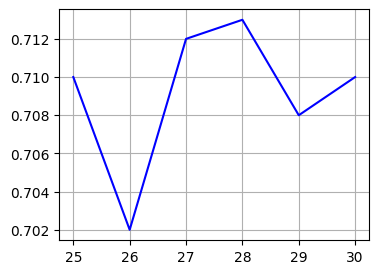

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

results = {n_dim: knn_with_pca(n_dim) for n_dim in range(25, 31)}

acc_df = pd.DataFrame.from_dict(results, orient='index', columns=['acc'])

plt.figure(figsize=(4,3))
plt.plot(acc_df.index, acc_df['acc'], c='blue')
plt.grid()
plt.show()

# Evaluation
- Confusion Matrix

# Fine Tuning 2
- optimize K using cross-validation

# Fine Tuning 3
- optimize dimension n and k values together

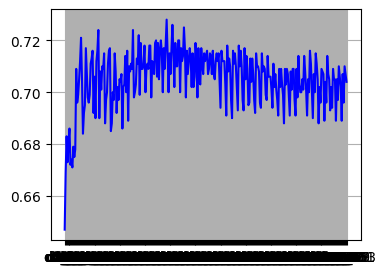

In [25]:
from itertools import product
from tqdm import tqdm

n_dims = range(2, 100, 2)
n_nes = range(3,15,2)

results = {}
for n_dim, n_ne in product(n_dims, n_nes):
    # print(f'd{n_dim}_n{n_ne}') 
    results[f'd{n_dim}_n{n_ne}'] = knn_with_pca(n_dim, n_ne)
    
acc_df = pd.DataFrame.from_dict(results, orient='index', columns=['acc'])


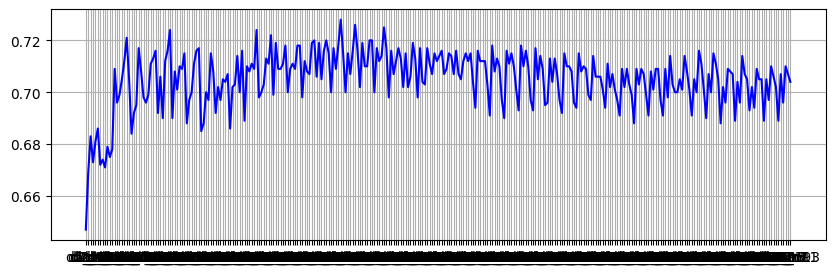

In [26]:
plt.figure(figsize=(10,3))
plt.plot(acc_df.index, acc_df['acc'], c='blue')
plt.grid()
plt.show()

In [27]:
print(acc_df[acc_df['acc']==acc_df['acc'].max()])

           acc
d36_n11  0.728
